In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 设置图形大小和字体
plt.figure(figsize=(16, 10))
matplotlib.rcParams['font.size'] = 32
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def plot_container_usage(log_file,start_time,end_time):
    """
    Reads the system usage data from a log file and plots the CPU, memory,
    and I/O write usage over a relative time period starting from zero.
    """
    # Read the log data into a pandas DataFrame
    df = pd.read_csv(log_file)
    # Convert 'time' from string to datetime
    df['time'] = pd.to_datetime(df['time'])
    # Normalize time to start from 0
    df['relative_time'] = (df['time'] - df['time'].min()).dt.total_seconds()

    # 数据验证：确保'cpu'和'memory'列是数值类型
    df['cpu'] = pd.to_numeric(df['cpu'].str.rstrip('%'), errors='coerce')
    #df['memory'] = pd.to_numeric(df['memory'].str.rstrip('%'), errors='coerce')

    # 如果数据中包含NaN，此处将它们替换为0
    df.fillna(0, inplace=True)
    # Set up the figure and axes
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Color configuration
    colors = ['#154360', '#1E8449', '#76448A']

    # Plot CPU and Memory usage
    ax1.plot(df['relative_time'], df['cpu'], color=colors[0], label='CPU Usage (%)', linestyle='--')
    #ax1.plot(df['relative_time'], df['memory'], color=colors[1], label='Memory Usage (%)')
    ax1.set_xlabel('Time (Second since start)')
    ax1.set_ylabel('Percentage (%)')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')

    # 标记热迁移开始
    hot_migration_start_time = pd.Timestamp(start_time)
    relative_hot_migration_start = (hot_migration_start_time - df['time'].min()).total_seconds()
    ax1.axvline(x=relative_hot_migration_start, color='r', linestyle=':')
    # ax1.annotate('Start', xy=(relative_hot_migration_start, 0), xytext=(relative_hot_migration_start-20, 10),
    #              textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
    
    ax1.annotate('Start', xy=(relative_hot_migration_start, 0), xytext=(-50, 40),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

    # Marking hot migration end
    hot_migration_end_time = pd.Timestamp(end_time)
    relative_hot_migration_end = (hot_migration_end_time - df['time'].min()).total_seconds()
    ax1.axvline(x=relative_hot_migration_end, color='r', linestyle=':')
    ax1.annotate('End', xy=(relative_hot_migration_end, 0), xytext=(20, 30),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))

    # Grid and Border configuration
    ax1.grid(axis='y', linestyle='--', color='grey')  # Set grid lines
    bwith = 2  # Border width
    TK = plt.gca()
    TK.spines['bottom'].set_linewidth(bwith)
    TK.spines['left'].set_linewidth(bwith)
    TK.spines['top'].set_linewidth(bwith)
    TK.spines['right'].set_linewidth(bwith)

    #plt.title('System Usage Over Time', fontsize=16)
    plt.tight_layout()
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

def plot_system_usage(log_file, start_time, end_time):
    """
    Reads the system usage data from a log file and plots the CPU, memory,
    and I/O write usage over a relative time period starting from zero.
    
    Parameters:
        log_file (str): The path to the CSV file containing system usage logs.
        start_time (str): The start time of the hot migration (ISO format string).
        end_time (str): The end time of the hot migration (ISO format string).
    """
    # Read the log data into a pandas DataFrame
    df = pd.read_csv(log_file)
    # Convert 'time' from string to datetime
    df['time'] = pd.to_datetime(df['time'])
    # Normalize time to start from 0
    df['relative_time'] = (df['time'] - df['time'].min()).dt.total_seconds()

    # Validate 'cpu' and 'memory' columns are numeric types
    df['cpu'] = pd.to_numeric(df['cpu'], errors='coerce')
    df.fillna(0, inplace=True)  # Replace NaN with 0 if any

    # Set up the figure and axes
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Color configuration
    colors = ['#154360', '#1E8449', '#76448A']

    # Plot CPU usage
    ax1.plot(df['relative_time'], df['cpu'], color=colors[0], label='CPU Usage (%)', linestyle='--')
    ax1.set_xlabel('Time (seconds since start)')
    ax1.set_ylabel('Percentage (%)')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')

    # Marking hot migration start
    hot_migration_start_time = pd.Timestamp(start_time)
    relative_hot_migration_start = (hot_migration_start_time - df['time'].min()).total_seconds()
    ax1.axvline(x=relative_hot_migration_start, color='r', linestyle=':')
    # ax1.annotate('Start', xy=(relative_hot_migration_start, 0), xytext=(relative_hot_migration_start-10, 10),
    #              textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
    ax1.annotate('Start', xy=(relative_hot_migration_start, 0), xytext=(-50, 40),
             textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
    # Marking hot migration end
    hot_migration_end_time = pd.Timestamp(end_time)
    relative_hot_migration_end = (hot_migration_end_time - df['time'].min()).total_seconds()
    ax1.axvline(x=relative_hot_migration_end, color='r', linestyle=':')
    # ax1.annotate('End', xy=(relative_hot_migration_end, 0), xytext=(relative_hot_migration_end+10, -10),
    #              textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
    ax1.annotate('End', xy=(relative_hot_migration_end, 0), xytext=(20, 30),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
    # Grid and Border configuration
    ax1.grid(axis='y', linestyle='--', color='grey')  # Set grid lines
    bwith = 2  # Border width
    TK = plt.gca()
    TK.spines['bottom'].set_linewidth(bwith)
    TK.spines['left'].set_linewidth(bwith)
    TK.spines['top'].set_linewidth(bwith)
    TK.spines['right'].set_linewidth(bwith)

    plt.tight_layout()
    plt.show()


<Figure size 1600x1000 with 0 Axes>

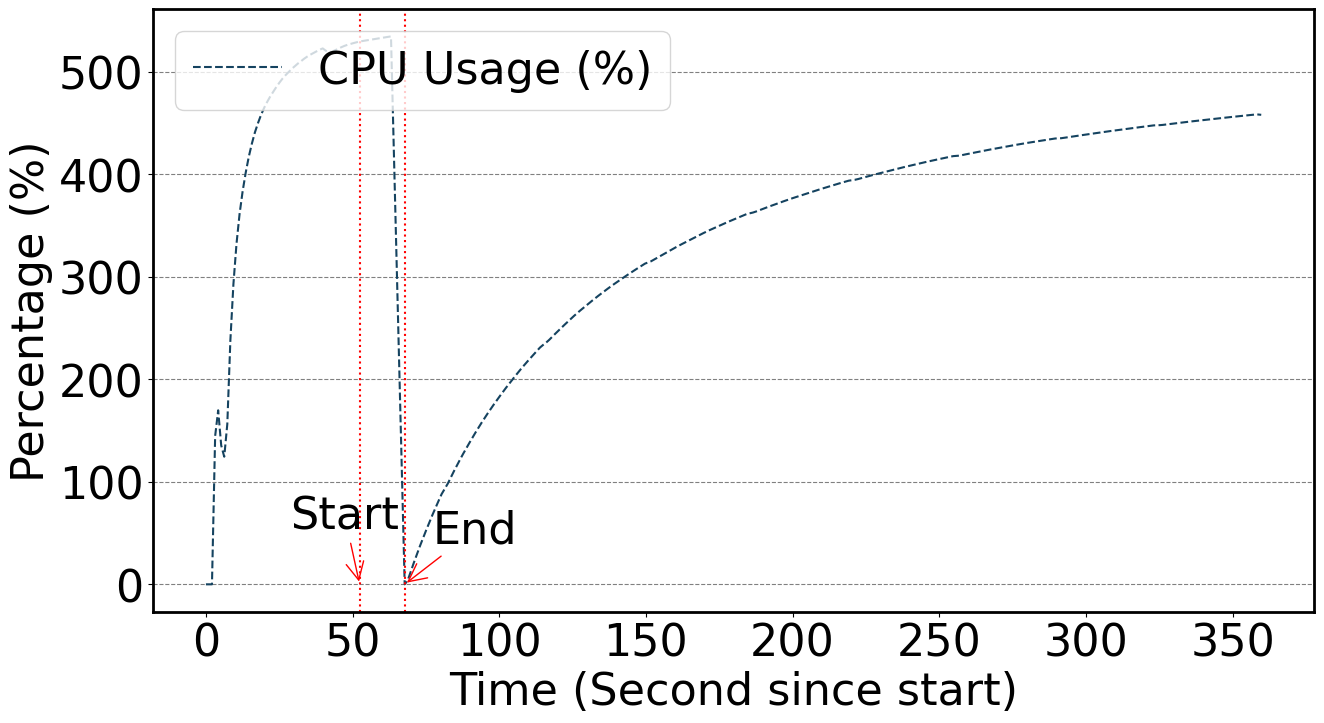

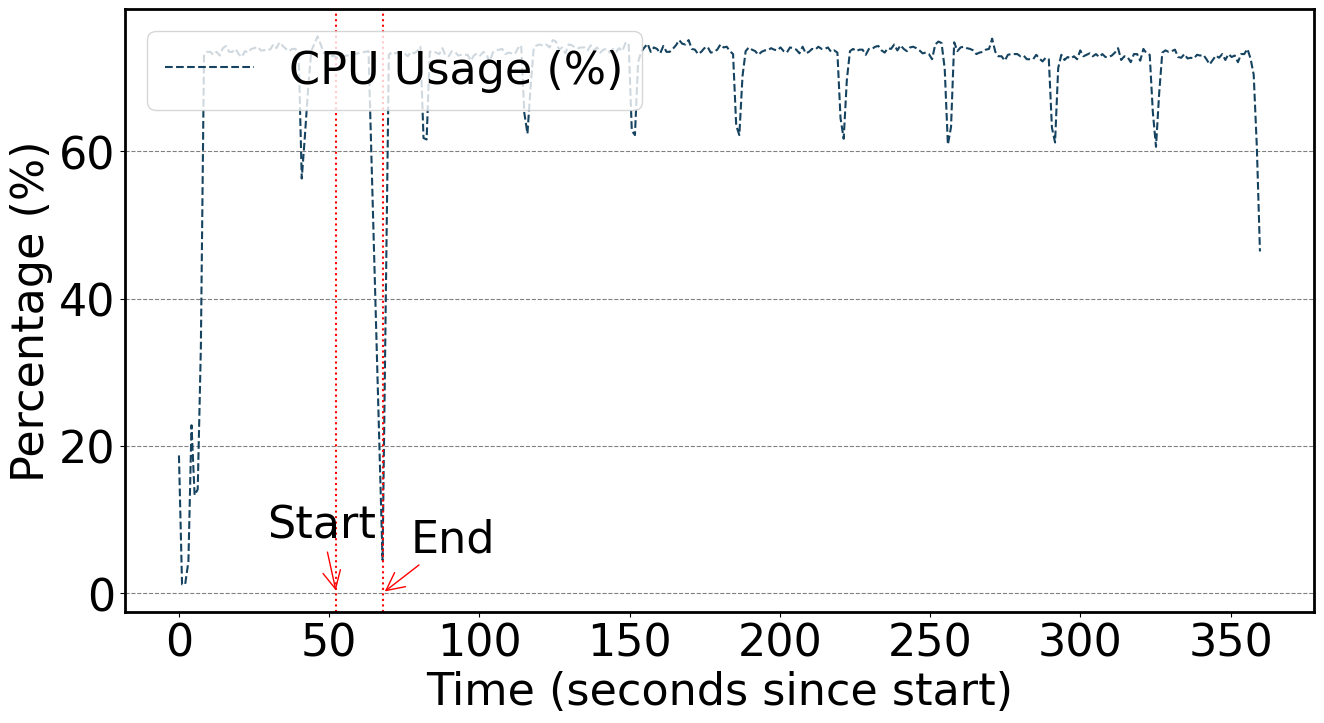

In [39]:



logs_live_container="/lsh/shiyan/shiyan2/src_resnet50/logs_live1/usage_logs.csv"

logs_live_system="/lsh/shiyan/shiyan2/src_resnet50/logs_live1/usage_system_logs.csv"
start_time = '2024-04-17 12:05:13.380852'
end_time = '2024-04-17 12:05:28.722344'
plot_container_usage(logs_live_container,start_time,end_time)
plot_system_usage(logs_live_system,start_time,end_time)


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 设置图形大小和字体
plt.figure(figsize=(16, 10))
matplotlib.rcParams['font.size'] = 32
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

def plot_container_usage_nolive(log_file):
    """
    Reads the system usage data from a log file and plots the CPU, memory,
    and I/O write usage over a relative time period starting from zero.
    """
    # Read the log data into a pandas DataFrame
    df = pd.read_csv(log_file)
    # Convert 'time' from string to datetime
    df['time'] = pd.to_datetime(df['time'])
    # Normalize time to start from 0
    df['relative_time'] = (df['time'] - df['time'].min()).dt.total_seconds()

    # 数据验证：确保'cpu'和'memory'列是数值类型
    df['cpu'] = pd.to_numeric(df['cpu'].str.rstrip('%'), errors='coerce')
    #df['memory'] = pd.to_numeric(df['memory'].str.rstrip('%'), errors='coerce')

    # 如果数据中包含NaN，此处将它们替换为0
    df.fillna(0, inplace=True)
    # Set up the figure and axes
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Color configuration
    colors = ['#154360', '#1E8449', '#76448A']

    # Plot CPU and Memory usage
    ax1.plot(df['relative_time'], df['cpu'], color=colors[0], label='CPU Usage (%)', linestyle='--')
    #ax1.plot(df['relative_time'], df['memory'], color=colors[1], label='Memory Usage (%)')
    ax1.set_xlabel('Time (Second since start)')
    ax1.set_ylabel('Percentage (%)')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')

    # Grid and Border configuration
    ax1.grid(axis='y', linestyle='--', color='grey')  # Set grid lines
    bwith = 2  # Border width
    TK = plt.gca()
    TK.spines['bottom'].set_linewidth(bwith)
    TK.spines['left'].set_linewidth(bwith)
    TK.spines['top'].set_linewidth(bwith)
    TK.spines['right'].set_linewidth(bwith)

    #plt.title('System Usage Over Time', fontsize=16)
    plt.tight_layout()
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt

def plot_system_usage_nolive(log_file):
    """
    Reads the system usage data from a log file and plots the CPU, memory,
    and I/O write usage over a relative time period starting from zero.
    
    Parameters:
        log_file (str): The path to the CSV file containing system usage logs.
        start_time (str): The start time of the hot migration (ISO format string).
        end_time (str): The end time of the hot migration (ISO format string).
    """
    # Read the log data into a pandas DataFrame
    df = pd.read_csv(log_file)
    # Convert 'time' from string to datetime
    df['time'] = pd.to_datetime(df['time'])
    # Normalize time to start from 0
    df['relative_time'] = (df['time'] - df['time'].min()).dt.total_seconds()

    # Validate 'cpu' and 'memory' columns are numeric types
    df['cpu'] = pd.to_numeric(df['cpu'], errors='coerce')
    df.fillna(0, inplace=True)  # Replace NaN with 0 if any

    # Set up the figure and axes
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Color configuration
    colors = ['#154360', '#1E8449', '#76448A']

    # Plot CPU usage
    ax1.plot(df['relative_time'], df['cpu'], color=colors[0], label='CPU Usage (%)', linestyle='--')
    ax1.set_xlabel('Time (seconds since start)')
    ax1.set_ylabel('Percentage (%)')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')

    
    # Grid and Border configuration
    ax1.grid(axis='y', linestyle='--', color='grey')  # Set grid lines
    bwith = 2  # Border width
    TK = plt.gca()
    TK.spines['bottom'].set_linewidth(bwith)
    TK.spines['left'].set_linewidth(bwith)
    TK.spines['top'].set_linewidth(bwith)
    TK.spines['right'].set_linewidth(bwith)

    plt.tight_layout()
    plt.show()


<Figure size 1600x1000 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
# 设置图形大小和字体
plt.figure(figsize=(16, 10))
matplotlib.rcParams['font.size'] = 32
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = ['SimHei']

<Figure size 1600x1000 with 0 Axes>

<Figure size 1008x720 with 0 Axes>

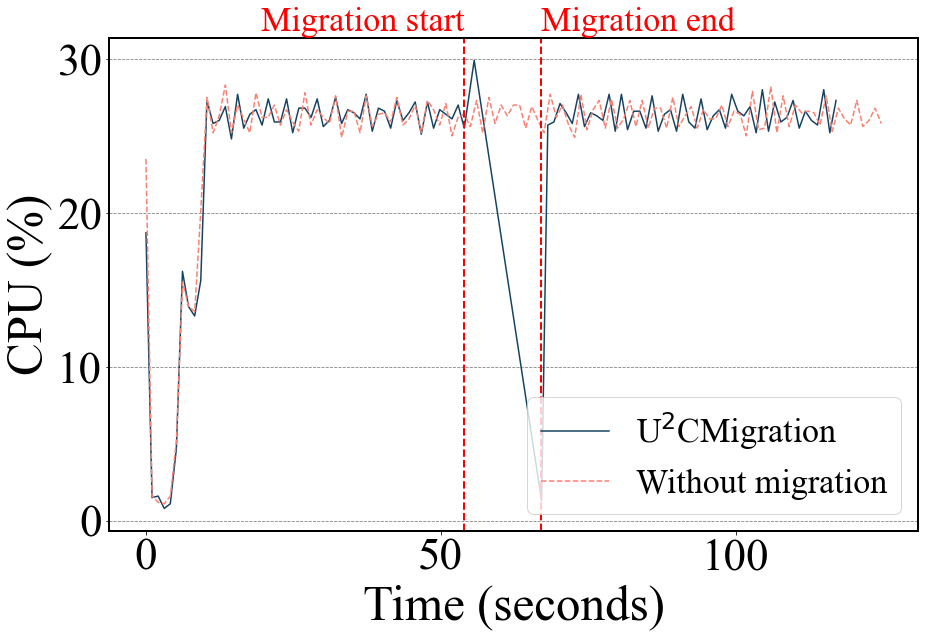

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
# 设置图形大小和字体
plt.figure(figsize=(14, 10))
matplotlib.rcParams['font.size'] = 45
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = ['Times New Roman']
label_size = 49
tick_size = 32
linewidth = 2.5
legend_size = 34
mark_size = 10
bwith = 2
def plot_system_usage(log_file1='logs/container_usage_logs.csv', log_file2='logs_origin/container_usage_logs.csv'):
    """
    Reads the system usage data from two log files and plots the CPU usage over
    a relative time period starting from zero, for each dataset.
    """
    # 读取日志数据到 pandas DataFrame
    df1 = pd.read_csv(log_file1)
    df2 = pd.read_csv(log_file2)
    
    # Convert 'time' from string to datetime and normalize time to start from 0
    for df in [df1, df2]:
        df['time'] = pd.to_datetime(df['time'])
        df['relative_time'] = (df['time'] - df['time'].min()).dt.total_seconds()  # Now in seconds
        df['cpu'] = pd.to_numeric(df['cpu'], errors='coerce')
        #df['memory'] = pd.to_numeric(df['memory'].str.rstrip('%'), errors='coerce')
    
    # 设置图形和轴
    # fig, ax1 = plt.subplots(figsize=(16, 12))
    fig, ax1 = plt.subplots(figsize=(14, 10))
    # 颜色配置
    colors = ['#154360', 'salmon']

    # 绘制 CPU 使用率
    ax1.plot(df1['relative_time'], df1['cpu'], color=colors[0], label='U$^{2}$CMigration')
    ax1.plot(df2['relative_time'], df2['cpu'], color=colors[1], label='Without migration', linestyle='--')
    ax1.set_xlabel('Time (seconds)', fontsize=label_size)
    ax1.set_ylabel('CPU (%)', fontsize=label_size)
    ax1.tick_params(axis='y')
    ax1.legend(loc='lower right', fontsize=legend_size)
    start_time = 54
    end_time = 67
    ax1.axvline(x=start_time, color='r', linestyle='--', linewidth=2)
    ax1.axvline(x=end_time, color='r', linestyle='--', linewidth=2)

    # Mark the start and end of migration
    ax1.text(start_time, max(ax1.get_ylim()), 'Migration start', horizontalalignment='right', verticalalignment='bottom', color='r', fontsize=34)
    ax1.text(end_time, max(ax1.get_ylim()), 'Migration end', horizontalalignment='left', verticalalignment='bottom', color='r', fontsize=34)

    # 网格和边框配置
    ax1.grid(axis='y', linestyle='--', color='grey')  # 设置网格线
    bwith = 2  # 边框宽度
    TK = plt.gca()
    TK.spines['bottom'].set_linewidth(bwith)
    TK.spines['left'].set_linewidth(bwith)
    TK.spines['top'].set_linewidth(bwith)
    TK.spines['right'].set_linewidth(bwith)

    
    plt.tight_layout()
    plt.savefig(os.path.join("img","system_useage.pdf") ,format='pdf',bbox_inches='tight')
    plt.savefig(os.path.join("img","system_useage.png") ,format='png',bbox_inches='tight')
    plt.show()
    
    
#  cpus = 2


logs_live_system="./logs_live1/usage_system_logs.csv"
logs_nolive_system="./logs_origin1/usage_system_logs.csv"

plot_system_usage(logs_live_system,logs_nolive_system)

<Figure size 1008x720 with 0 Axes>

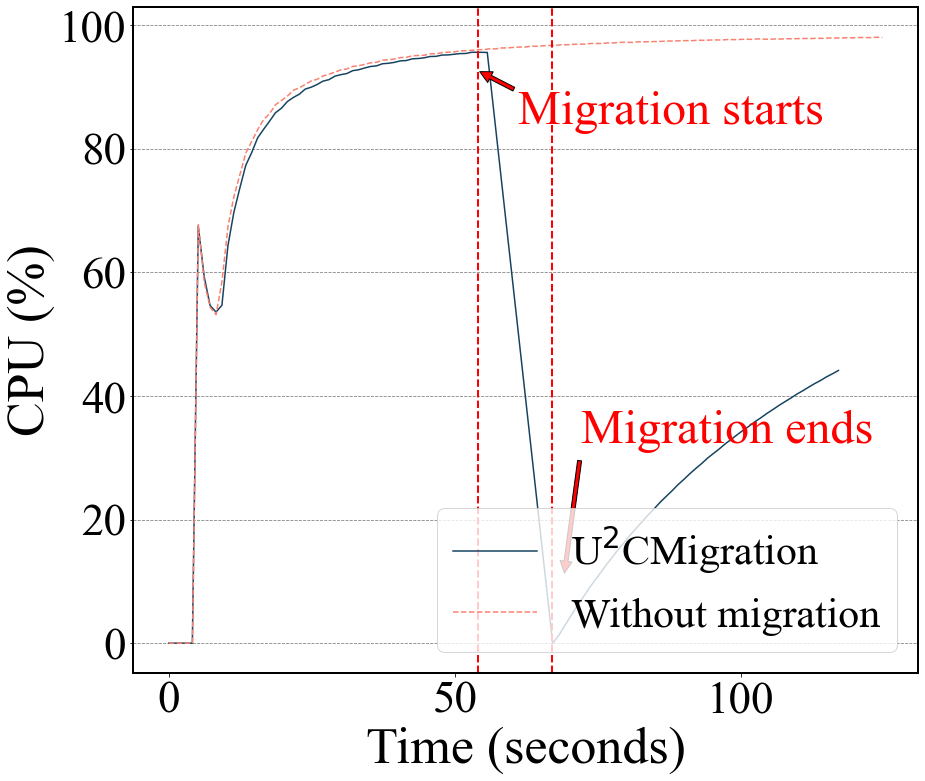

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
# 设置图形大小和字体
plt.figure(figsize=(14, 10))
matplotlib.rcParams['font.size'] = 45
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = ['Times New Roman']
label_size = 52
tick_size = 42
linewidth = 2.5
legend_size = 42
mark_size = 10
bwith = 2
def plot_container_usage(log_file1='logs/container_usage_logs.csv', log_file2='logs_origin/container_usage_logs.csv'):
    """
    Reads the system usage data from two log files and plots the CPU usage over
    a relative time period starting from zero, for each dataset.
    """
    # 读取日志数据到 pandas DataFrame
    df1 = pd.read_csv(log_file1)
    df2 = pd.read_csv(log_file2)
    
    # Convert 'time' from string to datetime and normalize time to start from 0
    for df in [df1, df2]:
        df['time'] = pd.to_datetime(df['time'])
        df['relative_time'] = (df['time'] - df['time'].min()).dt.total_seconds()  # Now in seconds
        df['cpu'] = pd.to_numeric(df['cpu'].str.rstrip('%'), errors='coerce')/2
        #df['memory'] = pd.to_numeric(df['memory'].str.rstrip('%'), errors='coerce')
    
    # 设置图形和轴
    #fig, ax1 = plt.subplots(figsize=(16, 12))
    fig, ax1 = plt.subplots(figsize=(14, 12))
    # 颜色配置
    colors = ['#154360', 'salmon']

    # 绘制 CPU 使用率
    ax1.plot(df1['relative_time'], df1['cpu'], color=colors[0], label='U$^{2}$CMigration')
    ax1.plot(df2['relative_time'], df2['cpu'], color=colors[1], label='Without migration', linestyle='--')
    ax1.set_xlabel('Time (seconds)', fontsize=label_size)
    ax1.set_ylabel('CPU (%)', fontsize=label_size)
    ax1.tick_params(axis='y')
    ax1.legend(loc='lower right', fontsize=legend_size)
    start_time = 54
    end_time = 67
    ax1.axvline(x=start_time, color='r', linestyle='--', linewidth=2)
    ax1.axvline(x=end_time, color='r', linestyle='--', linewidth=2)

   # Mark the start and end of migration with arrows
    ax1.annotate('Migration starts', xy=(start_time, max(ax1.get_ylim())*0.9), xytext=(start_time + 7, max(ax1.get_ylim()) * 0.8),
                 arrowprops=dict(facecolor='red', shrink=0.05), fontsize=48, color='r', horizontalalignment='left', verticalalignment='bottom')
    ax1.annotate('Migration ends', xy=(end_time+2, max(ax1.get_ylim())*0.1), xytext=(end_time + 5, max(ax1.get_ylim()) * 0.3),
                 arrowprops=dict(facecolor='red', shrink=0.05), fontsize=48, color='r', horizontalalignment='left', verticalalignment='bottom')

    # 网格和边框配置
    ax1.grid(axis='y', linestyle='--', color='grey')  # 设置网格线
    # ax1.grid(axis='x', linestyle='--', color='grey')
    bwith = 2  # 边框宽度
    TK = plt.gca()
    TK.spines['bottom'].set_linewidth(bwith)
    TK.spines['left'].set_linewidth(bwith)
    TK.spines['top'].set_linewidth(bwith)
    TK.spines['right'].set_linewidth(bwith)

    
    plt.tight_layout()
    plt.savefig(os.path.join("img","container_useage.pdf") ,format='pdf',bbox_inches='tight')
    plt.savefig(os.path.join("img","container_useage.png") ,format='pdf',bbox_inches='tight')
    plt.show()
   
    
logs_live_container="./logs_live1/usage_logs.csv"
logs_nolive_container="./logs_origin1/usage_logs.csv"
plot_container_usage(logs_live_container,logs_nolive_container)

<Figure size 1008x720 with 0 Axes>

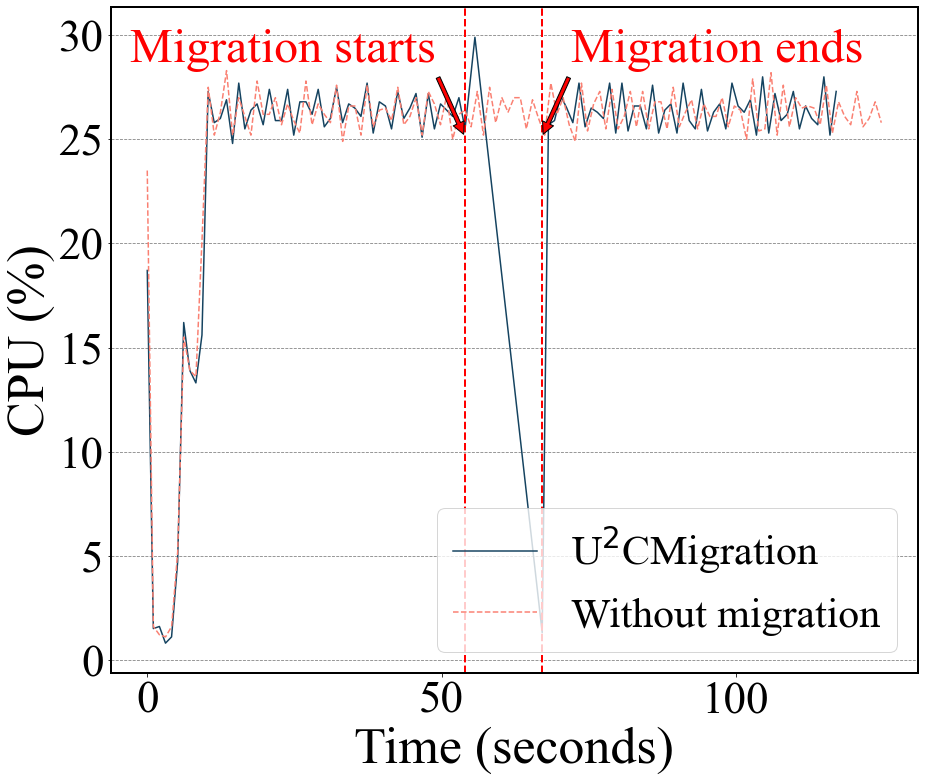

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
plt.figure(figsize=(14, 10))
matplotlib.rcParams['font.size'] = 45
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = ['Times New Roman']
label_size = 52
tick_size = 42
linewidth = 2.5
legend_size = 42
mark_size = 10
bwith = 2

def plot_system_usage(log_file1='logs/container_usage_logs.csv', log_file2='logs_origin/container_usage_logs.csv'):
    """
    Reads the system usage data from two log files and plots the CPU usage over
    a relative time period starting from zero, for each dataset.
    """
    # 读取日志数据到 pandas DataFrame
    df1 = pd.read_csv(log_file1)
    df2 = pd.read_csv(log_file2)
    
    # Convert 'time' from string to datetime and normalize time to start from 0
    for df in [df1, df2]:
        df['time'] = pd.to_datetime(df['time'])
        df['relative_time'] = (df['time'] - df['time'].min()).dt.total_seconds()  # Now in seconds
        df['cpu'] = pd.to_numeric(df['cpu'], errors='coerce')
    
    # 设置图形和轴
    fig, ax1 = plt.subplots(figsize=(14, 12))
    # 颜色配置
    colors = ['#154360', 'salmon']

    # 绘制 CPU 使用率
    ax1.plot(df1['relative_time'], df1['cpu'], color=colors[0], label='U$^{2}$CMigration')
    ax1.plot(df2['relative_time'], df2['cpu'], color=colors[1], label='Without migration', linestyle='--')
    ax1.set_xlabel('Time (seconds)', fontsize=label_size)
    ax1.set_ylabel('CPU (%)', fontsize=label_size)
    ax1.tick_params(axis='y')
    ax1.legend(loc='lower right', fontsize=legend_size)
    
    start_time = 54
    end_time = 67
    ax1.axvline(x=start_time, color='r', linestyle='--', linewidth=2)
    ax1.axvline(x=end_time, color='r', linestyle='--', linewidth=2)

    # Mark the start and end of migration with arrows
    ax1.annotate('Migration starts', xy=(start_time, max(ax1.get_ylim())*0.8), xytext=(start_time - 5, max(ax1.get_ylim()) * 0.9),
                 arrowprops=dict(facecolor='red', shrink=0.05), fontsize=48, color='r', horizontalalignment='right', verticalalignment='bottom')
    ax1.annotate('Migration ends', xy=(end_time, max(ax1.get_ylim())*0.8), xytext=(end_time + 5, max(ax1.get_ylim()) * 0.9),
                 arrowprops=dict(facecolor='red', shrink=0.05), fontsize=48, color='r', horizontalalignment='left', verticalalignment='bottom')

    # 网格和边框配置
    ax1.grid(axis='y', linestyle='--', color='grey')  # 设置网格线
    bwith = 2  # 边框宽度
    TK = plt.gca()
    TK.spines['bottom'].set_linewidth(bwith)
    TK.spines['left'].set_linewidth(bwith)
    TK.spines['top'].set_linewidth(bwith)
    TK.spines['right'].set_linewidth(bwith)

    plt.tight_layout()
    # plt.savefig(os.path.join("img", "system_useage.pdf"), format='pdf', bbox_inches='tight')
    # plt.savefig(os.path.join("img", "system_useage.png"), format='png', bbox_inches='tight')
    plt.show()

logs_live_system = "./logs_live1/usage_system_logs.csv"
logs_nolive_system = "./logs_origin1/usage_system_logs.csv"

plot_system_usage(logs_live_system, logs_nolive_system)
